# EXPLORATORY DATA ANALYSIS ON ZOMATO DATA

## Importing all the necessary modules

In [1]:
import numpy as np                      # for the 2-d matrices
import pandas as pd                     # for the data frames
import matplotlib.pyplot as plt         # for data vizualizations 
import seaborn as sns                   # for the visualizations 

## Importing the data from an external source into the Python environment

In [2]:
df=pd.read_csv('zomato.csv',encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
df.shape

(9551, 21)

In [4]:
df_country=pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
df_country.shape

(15, 2)

## Renaming the variables as per the Naming conversion.

In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.columns = [i.replace(' ','_') for i in df.columns]
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9551 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Is_delivering_now     9551 non-null   object 
 15  Switch_to_order_menu 

In [9]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [10]:
df_country.columns=[i.replace(' ','_') for i in df_country.columns]
df_country.columns

Index(['Country_Code', 'Country'], dtype='object')

In [11]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country_Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


## Merging the two datasets

In [12]:
final_data=pd.merge(df,df_country,how='inner',left_on='Country_Code',right_on='Country_Code')
final_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant_ID         9551 non-null   int64  
 1   Restaurant_Name       9551 non-null   object 
 2   Country_Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality_Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average_Cost_for_two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has_Table_booking     9551 non-null   object 
 13  Has_Online_delivery   9551 non-null   object 
 14  Is_delivering_now     9551 non-null   object 
 15  Switch_to_order_menu 

## Data Duplicacy Treatment

In [14]:
final_data.duplicated().value_counts()

False    9551
Name: count, dtype: int64

In [15]:
final_data.duplicated().sum()

0

## Missing Values Treatment

In [16]:
 final_data.isna().sum()

Restaurant_ID           0
Restaurant_Name         0
Country_Code            0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average_Cost_for_two    0
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Aggregate_rating        0
Rating_color            0
Rating_text             0
Votes                   0
Country                 0
dtype: int64

## Filling missing values in Categorical data with the Mode values.

In [17]:
categorical_data = [var for var in final_data.columns if final_data[var].dtype == 'O']
categorical_data

['Restaurant_Name',
 'City',
 'Address',
 'Locality',
 'Locality_Verbose',
 'Cuisines',
 'Currency',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu',
 'Rating_color',
 'Rating_text',
 'Country']

In [18]:
cat_data = final_data[categorical_data]

In [19]:
cat_data['Restaurant_ID'] = final_data['Restaurant_ID']

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_12088\3666181678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Restaurant_ID'] = final_data['Restaurant_ID']


In [20]:
cat_data.head()

,Restaurant_Name,City,Address,Locality,Locality_Verbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Rating_color,Rating_text,Country,Restaurant_ID
0,Le Petit Souffle,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...","French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines,6317637
1,Izakaya Kikufuji,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",Japanese,Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines,6304287
2,Heat - Edsa Shangri-La,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...","Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,Green,Very Good,Phillipines,6300002
3,Ooma,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Sushi",Botswana Pula(P),No,No,No,No,Dark Green,Excellent,Phillipines,6318506
4,Sambo Kojin,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...","Japanese, Korean",Botswana Pula(P),Yes,No,No,No,Dark Green,Excellent,Phillipines,6314302


In [21]:
cat_data.shape

(9551, 15)

In [22]:
for i in cat_data.columns:
        cat_data[i] = cat_data[i].fillna(cat_data[i].mode())

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_12088\2803963677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = cat_data[i].fillna(cat_data[i].mode())


In [23]:
cat_data.isna().sum()

Restaurant_Name         0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Cuisines                9
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Rating_color            0
Rating_text             0
Country                 0
Restaurant_ID           0
dtype: int64

In [24]:
cat_data.Cuisines.value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [25]:
cat_data.Country.count()

9551

In [26]:
cat_data.Cuisines.value_counts().head()

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64

In [27]:
cat_data.loc[cat_data['Cuisines'] == None]

,Restaurant_Name,City,Address,Locality,Locality_Verbose,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Rating_color,Rating_text,Country,Restaurant_ID


In [28]:
s = pd.Series(cat_data.Cuisines.isna())
s[s == True]

84     True
87     True
94     True
288    True
312    True
328    True
349    True
395    True
432    True
Name: Cuisines, dtype: bool

In [29]:
cat_data.loc[94,]

Restaurant_Name                          Jimmie's Hot Dogs
City                                                Albany
Address                 204 S Jackson St, Albany, GA 31701
Locality                                            Albany
Locality_Verbose                            Albany, Albany
Cuisines                                               NaN
Currency                                         Dollar($)
Has_Table_booking                                       No
Has_Online_delivery                                     No
Is_delivering_now                                       No
Switch_to_order_menu                                    No
Rating_color                                        Yellow
Rating_text                                           Good
Country                                      United States
Restaurant_ID                                     17284158
Name: 94, dtype: object

In [30]:
cat_data['Cuisines']  = cat_data['Cuisines'].replace("NaN",None)

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_12088\3543376501.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Cuisines']  = cat_data['Cuisines'].replace("NaN",None)


In [31]:
cat_data.Cuisines.value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [32]:
cat_data.isna().sum()

Restaurant_Name         0
City                    0
Address                 0
Locality                0
Locality_Verbose        0
Cuisines                9
Currency                0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Rating_color            0
Rating_text             0
Country                 0
Restaurant_ID           0
dtype: int64

In [33]:
mode_value=cat_data['Cuisines'].mode()[0]
mode_value

'North Indian'

In [34]:
cat_data2=cat_data['Cuisines'].fillna(mode_value)
cat_data2

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [35]:
cat_data2.isna().sum()

0

In [36]:
num = [var for var in final_data.columns if final_data[var].dtype != 'O']
num_data = final_data[num]
num_data.head()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
0,6317637,162,121.027535,14.565443,1100,3,4.8,314
1,6304287,162,121.014101,14.553708,1200,3,4.5,591
2,6300002,162,121.056831,14.581404,4000,4,4.4,270
3,6318506,162,121.056475,14.585318,1500,4,4.9,365
4,6314302,162,121.057508,14.584450,1500,4,4.8,229


## checking the value count and nunique of categorical variable

In [37]:
cat_data.Restaurant_Name.value_counts()

Restaurant_Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [38]:
cat_data.Restaurant_Name.nunique()

7446

In [39]:
cat_data.City.value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: count, Length: 141, dtype: int64

In [40]:
cat_data.City.nunique()

141

In [41]:
cat_data.Currency.value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [42]:
cat_data.Currency.nunique()

12

In [43]:
cat_data.Cuisines.value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [44]:
cat_data.Cuisines.nunique()

1825

In [45]:
cat_data.Has_Table_booking.value_counts()

Has_Table_booking
No     8393
Yes    1158
Name: count, dtype: int64

In [46]:
cat_data.Has_Table_booking.nunique()

2

## Outlier Treatment

In [47]:
final_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## observing a single column for the outliers

In [48]:
final_data.describe()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [49]:
 min_Amt = final_data.Average_Cost_for_two.min()
min_Amt

0

In [50]:
max_Amt = final_data.Average_Cost_for_two.max()
max_Amt

800000

**quantile() helps to find the percentile vaues at each percentile mark**

In [51]:
median = final_data.Average_Cost_for_two.quantile(0.5)
median

400.0

In [52]:
f_q = final_data.Average_Cost_for_two.quantile(0.25)
t_q = final_data.Average_Cost_for_two.quantile(0.75)
p_1 = final_data.Average_Cost_for_two.quantile(0.01)
p_99 = final_data.Average_Cost_for_two.quantile(0.99)

In [53]:
print("First quartile:",f_q)
print("Third quartile:",t_q)
print("Bottom 1%ile cutoff:",p_1)
print("Top 1%ile cutoff:",p_99)

First quartile: 250.0
Third quartile: 700.0
Bottom 1%ile cutoff: 10.0
Top 1%ile cutoff: 3400.0


In [54]:
#iqr = q3 - q1
iqr = 700.0 - 250.0
iqr

450.0

In [55]:
#lc = q1 - 1.5*iqr
#uc = q3 + 1.5*iqr

In [56]:
lc = 250.0 - (1.5*iqr)
lc

-425.0

In [57]:
uc = 700.0 + (1.5*iqr)
uc

1375.0

<Axes: >

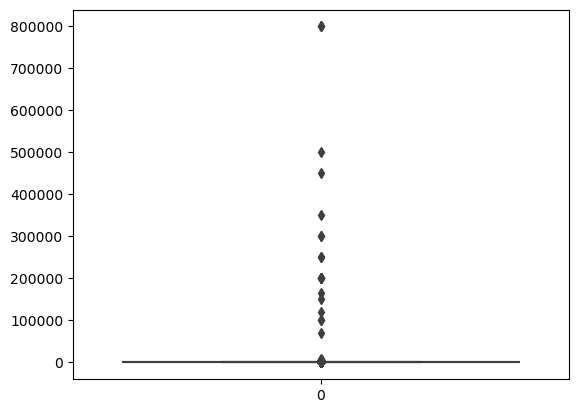

In [58]:
sns.boxplot(final_data.Average_Cost_for_two)

<Axes: >

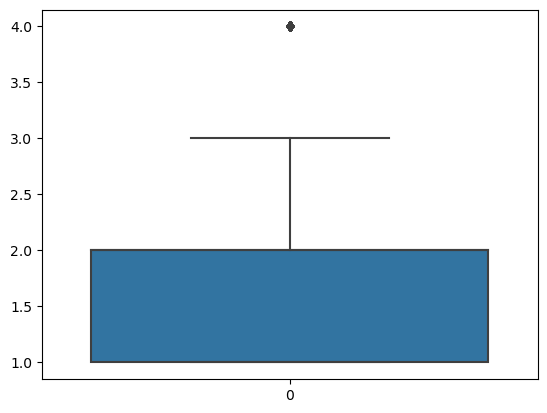

In [59]:
sns.boxplot(final_data.Price_range)

<Axes: >

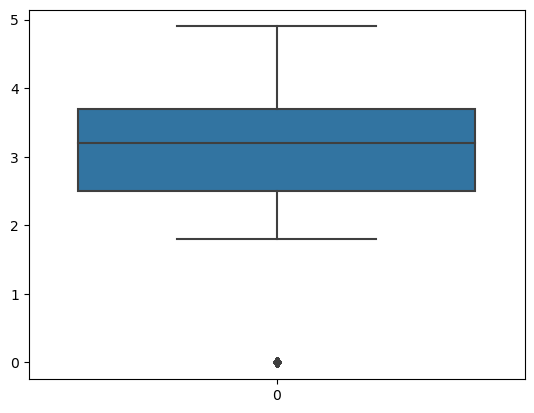

In [60]:
sns.boxplot(final_data.Aggregate_rating)

<Axes: >

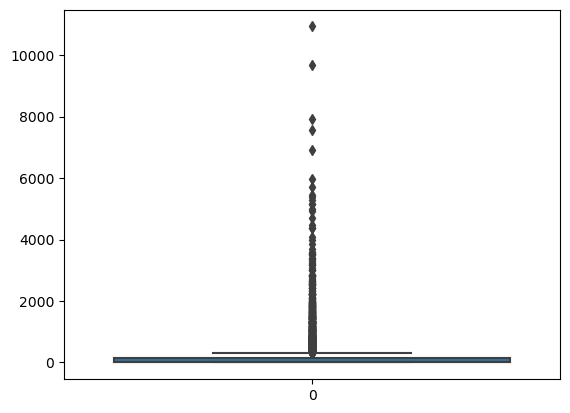

In [61]:
sns.boxplot(final_data.Votes)

In [62]:
lc

-425.0

In [63]:
uc

1375.0

In [64]:
final_data['Average_Cost_for_two'] = final_data.Average_Cost_for_two.clip(lower = lc, upper = uc)

<Axes: >

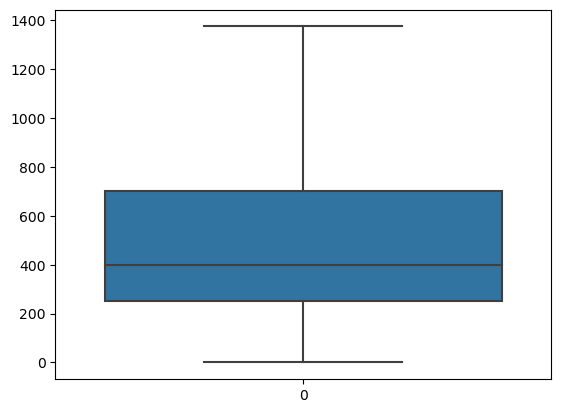

In [65]:
sns.boxplot(final_data.Average_Cost_for_two)

In [66]:
median = final_data.Votes.quantile(0.5)
median

31.0

In [67]:
f_q = final_data.Votes.quantile(0.25)
t_q = final_data.Votes.quantile(0.75)
p_1 = final_data.Votes.quantile(0.01)
p_99 = final_data.Votes.quantile(0.99)

In [68]:
print("First quartile:",f_q)
print("Third quartile:",t_q)
print("Bottom 1%ile cutoff:",p_1)
print("Top 1%ile cutoff:",p_99)

First quartile: 5.0
Third quartile: 131.0
Bottom 1%ile cutoff: 0.0
Top 1%ile cutoff: 1882.5


In [69]:
#iqr = q3 - q1
iqr = 131.0 - 5.0
iqr

126.0

In [70]:
lc = 5.0- (1.5*iqr)
lc

-184.0

In [71]:
uc = 131.0 + (1.5*iqr)
uc

320.0

In [72]:
#Outliers have been clipped.
final_data['Votes'] = final_data.Votes.clip(lower = lc, upper = uc)

<Axes: >

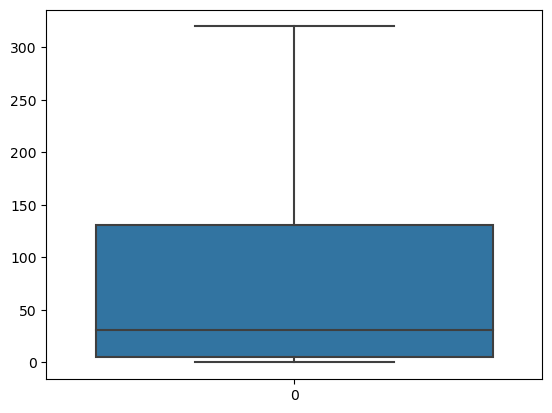

In [73]:
sns.boxplot(final_data.Votes)

In [74]:
def outlier_IQR(s):
    m = s.quantile(0.5)
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    q_1p = s.quantile(0.01)
    q_99p = s.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    result = pd.Series([m,q1,q3,q_1p,q_99p,iqr,lc,uc])
    result.index = ['median','first_quartile','third_quartile','pc_1','pc_99','iqr','lower_cutoff','upper_cutoff']
    return result

In [75]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [76]:
num_data.apply(outliertreat_IQR)

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
0,-26773531.0,1.0,76.780348,28.232644,-425.0,-0.5,0.7,-184.0
1,45427785.0,1.0,77.583001,28.888827,1375.0,3.5,5.5,320.0


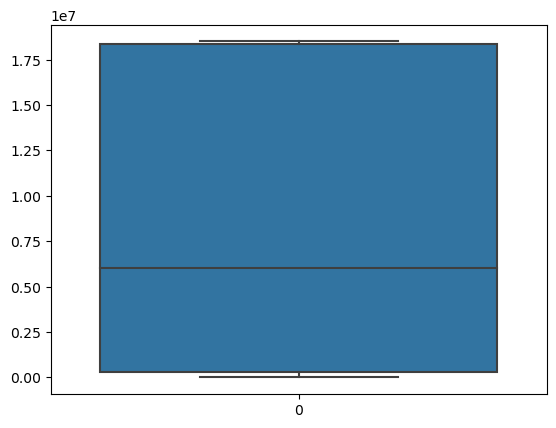

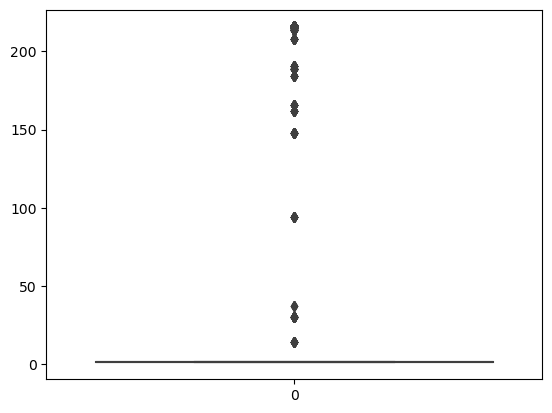

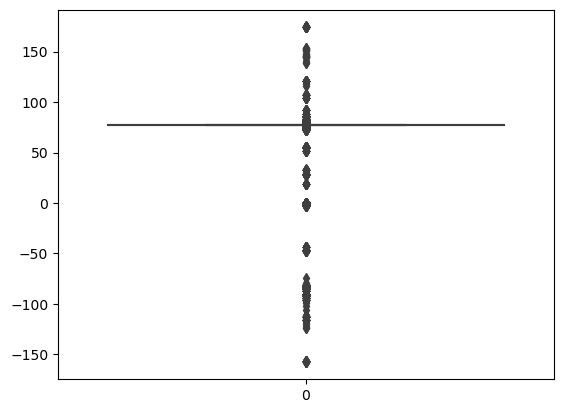

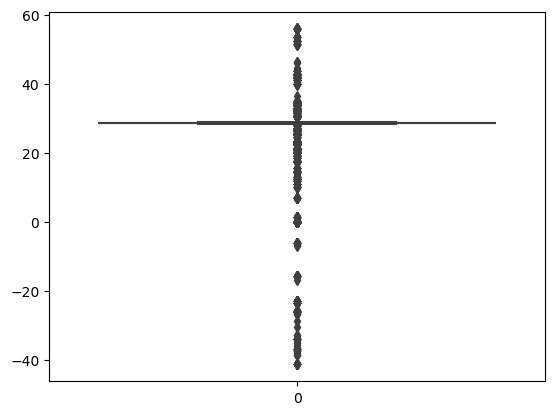

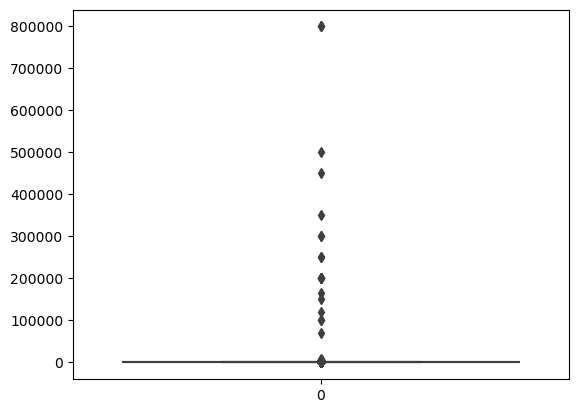

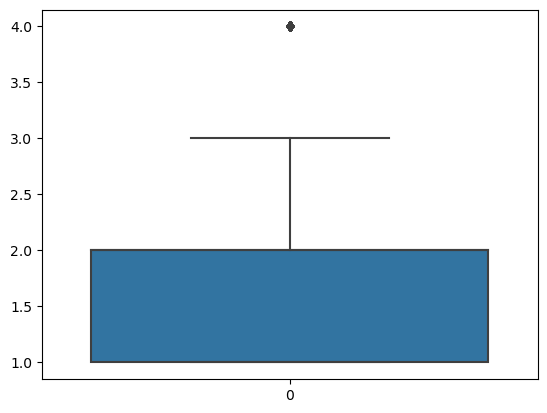

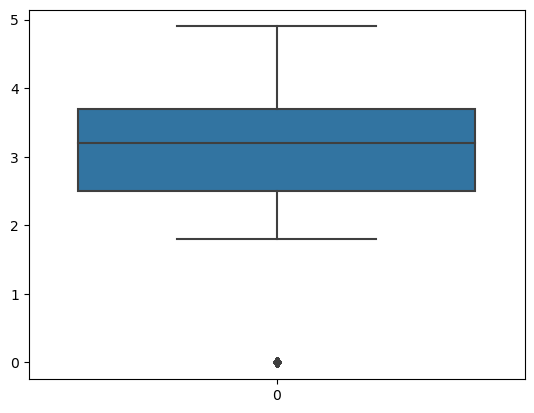

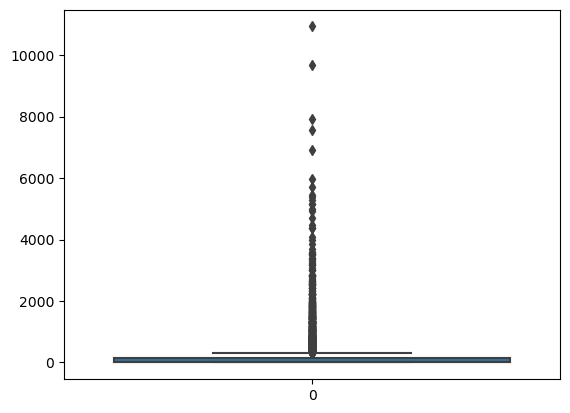

In [77]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

In [78]:
num_data['Country_Code'] = num_data['Country_Code'].clip(lower = 1.0, upper = 1.0)
num_data['Longitude'] = num_data['Longitude'].clip(lower =76.780348, upper = 77.583001)
num_data['Latitude'] = num_data['Latitude'].clip(lower = 28.232644, upper = 28.888827)

C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_12088\3368621580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Country_Code'] = num_data['Country_Code'].clip(lower = 1.0, upper = 1.0)
C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_12088\3368621580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Longitude'] = num_data['Longitude'].clip(lower =76.780348, upper = 77.583001)
C:\Users\Gaya Gopan\AppData\Local\Temp\ipykernel_12088\3368621580.py:3: SettingWithCopyWarning: 
A value 

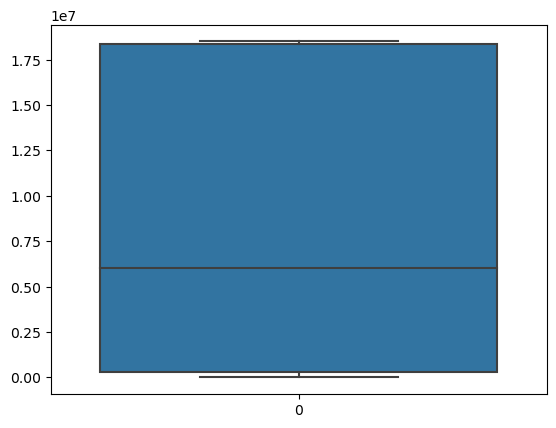

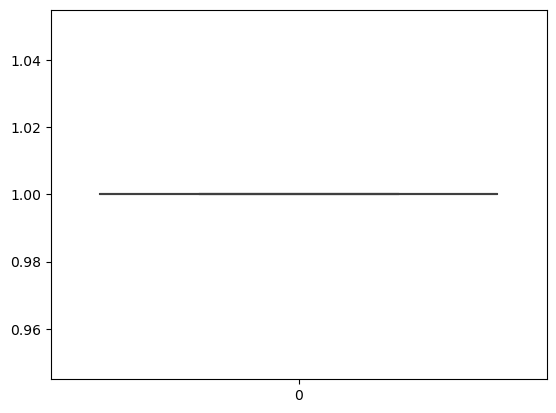

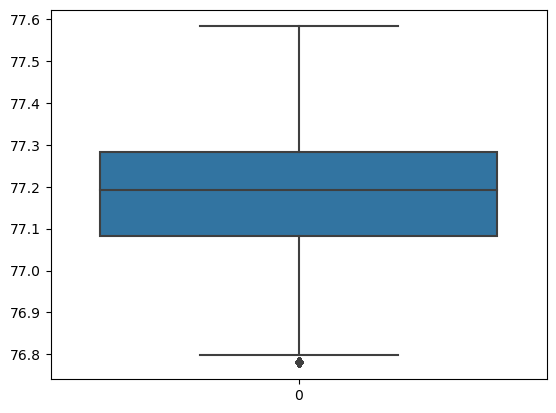

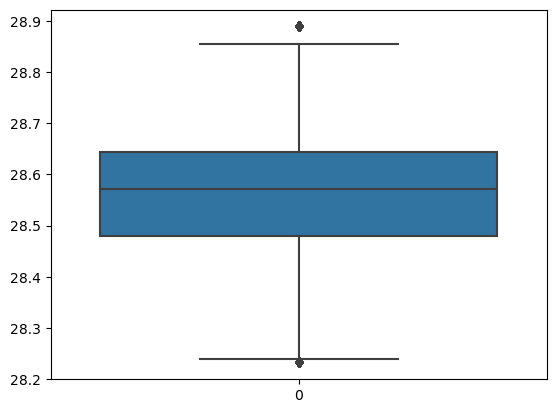

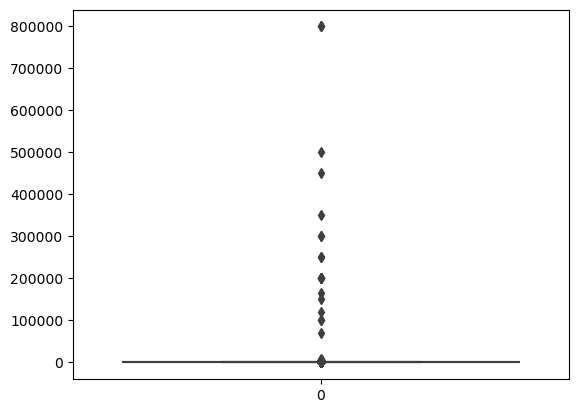

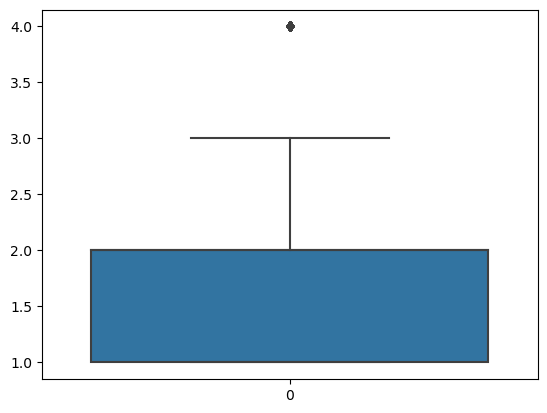

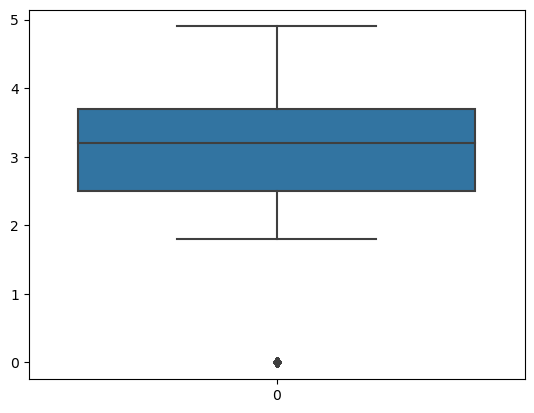

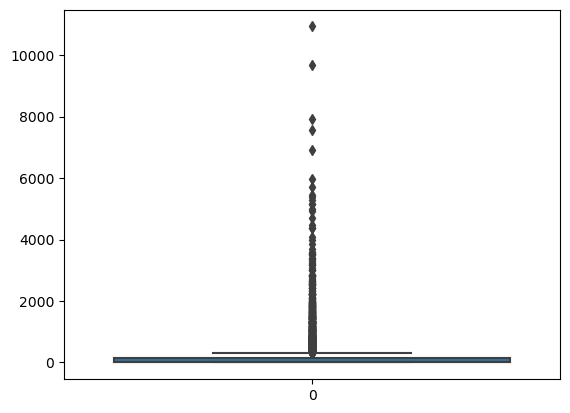

In [79]:
for col in num_data:
    sns.boxplot(num_data[col])
    plt.show()

<Axes: >

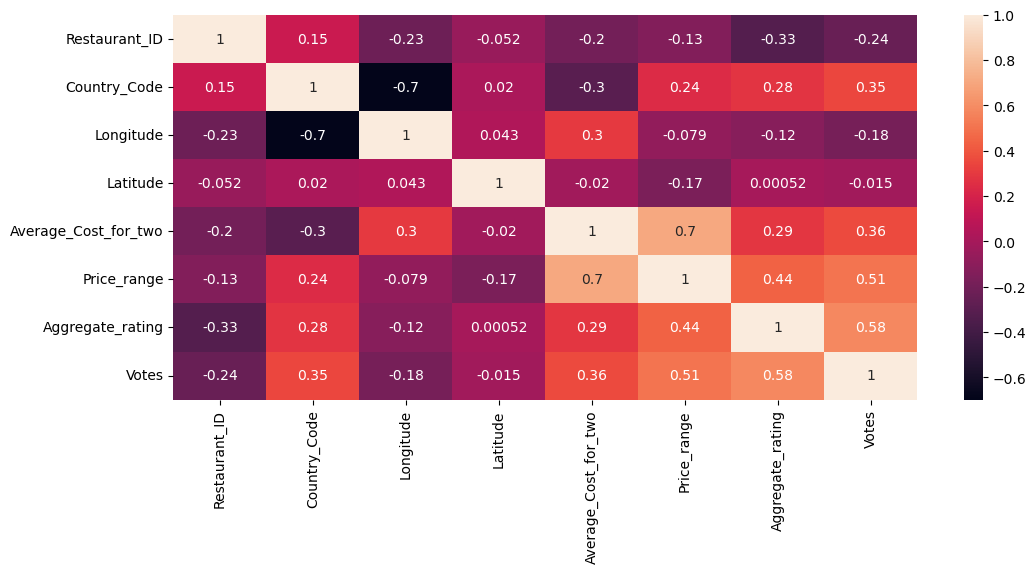

In [80]:
plt.figure(figsize=(12,5))
sns.heatmap(final_data.select_dtypes(['int','float']).corr(), annot = True)

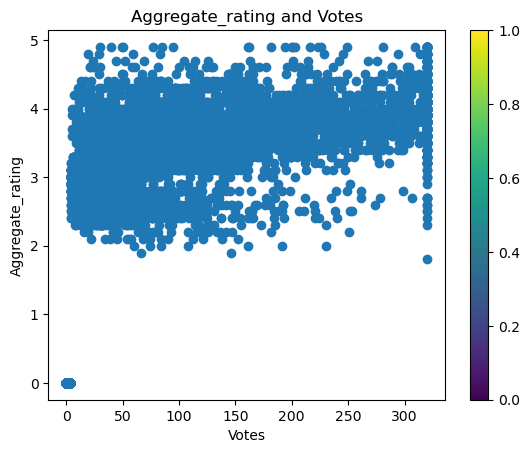

In [81]:
plt.scatter(final_data['Votes'],final_data['Aggregate_rating'])
plt.title("Aggregate_rating and Votes")
plt.xlabel('Votes')
plt.ylabel('Aggregate_rating')
plt.colorbar()
plt.show()

## top 4 countries that uses zomato

In [82]:
country_count=final_data['Country'].value_counts()
country_count

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [83]:
top_4_country=country_count.nlargest(4)
top_4_country

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
Name: count, dtype: int64

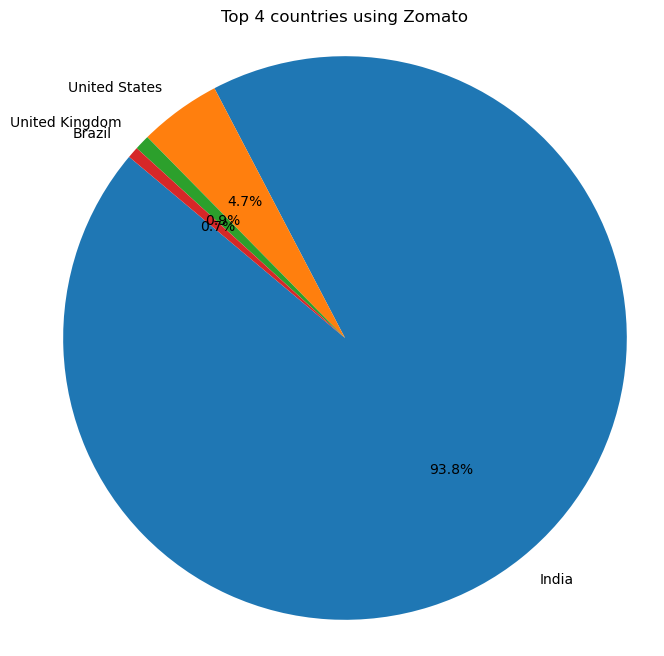

In [84]:
plt.figure(figsize=(8,8))
plt.pie(top_4_country,labels=top_4_country.index,autopct='%1.1f%%',startangle=140)
plt.title('Top 4 countries using Zomato')
plt.axis('equal')
plt.show()

**India has high records or transaction of zomato**

## Rating of Zomato

In [85]:
Rating = final_data.groupby(['Aggregate_rating', 'Rating_color', 'Rating_text']).size().reset_index().rename(columns={0:'rating count'})
Rating

,Aggregate_rating,Rating_color,Rating_text,rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Rating_text'>

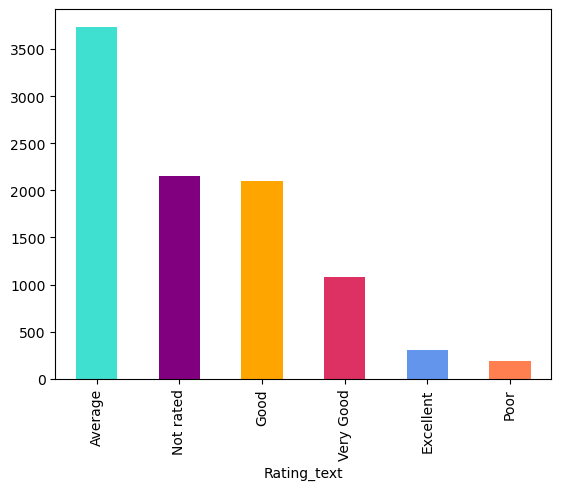

In [104]:
final_data['Rating_text'].value_counts().plot(kind='bar',color=['#40E0D0','purple','orange','#DE3163','#6495ED','#FF7F50'])

## Finding out which currency is used by which country

In [87]:
final_data.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Is_delivering_now', 'Switch_to_order_menu',
       'Price_range', 'Aggregate_rating', 'Rating_color', 'Rating_text',
       'Votes', 'Country'],
      dtype='object')

In [88]:
final_data[['Country','Currency']].groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


## Delivery types in different countries

In [89]:
final_data[['Has_Online_delivery','Country']].groupby(['Has_Online_delivery','Country']).size().reset_index()

,Has_Online_delivery,Country,0
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


In [90]:
final_data[final_data['Has_Online_delivery']=='Yes'].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [91]:
final_data[final_data['Has_Online_delivery']=='No'].Country.value_counts()

Country
India             6229
United States      434
United Kingdom      80
Brazil              60
South Africa        60
New Zealand         40
Turkey              34
UAE                 32
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [92]:
delivery_type = final_data.groupby(['Restaurant_Name','Country','Has_Online_delivery', 'Has_Table_booking' ]).size().reset_index().rename(columns={0:'delivery count'})
delivery_type

,Restaurant_Name,Country,Has_Online_delivery,Has_Table_booking,delivery count
0,Let's Burrrp,India,No,No,1
1,#45,India,No,No,1
2,#Dilliwaala6,India,No,No,1
3,#InstaFreeze,India,No,No,1
4,#OFF Campus,India,Yes,Yes,1
...,...,...,...,...,...
7738,t Lounge by Dilmah,India,No,No,1
7739,tashas,South Africa,No,No,1
7740,wagamama,New Zealand,No,No,1
7741,{Niche} - Cafe & Bar,India,No,Yes,1


Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


Text(0, 0.5, 'Has_Online_delivery')

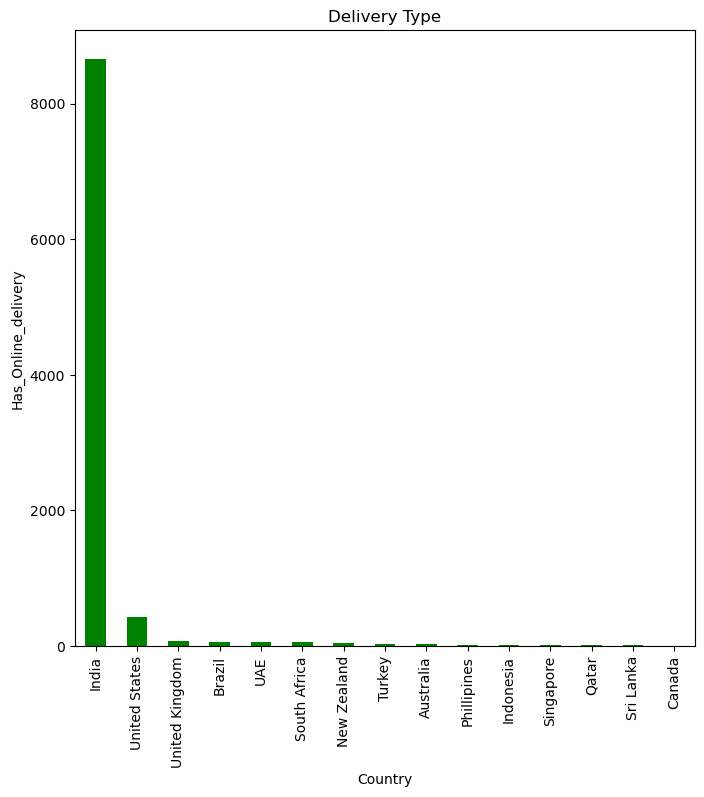

In [93]:
print(final_data['Country'].value_counts())
final_data['Country'].value_counts().plot(kind = 'bar',color = 'green',figsize = (8,8))
plt.title("Delivery Type")
plt.xlabel("Country")
plt.ylabel("Has_Online_delivery")


In [94]:
final_data[['Has_Online_delivery','City']].groupby(['Has_Online_delivery','City']).size().reset_index()

,Has_Online_delivery,City,0
0,No,Abu Dhabi,9
1,No,Agra,20
2,No,Ahmedabad,10
3,No,Albany,20
4,No,Allahabad,20
...,...,...,...
157,Yes,New Delhi,1489
158,Yes,Noida,364
159,Yes,Pune,7
160,Yes,Secunderabad,1


In [95]:
final_data[final_data['Has_Online_delivery']=='Yes'].City.value_counts()

City
New Delhi       1489
Gurgaon          425
Noida            364
Faridabad         35
Chennai           13
Abu Dhabi         11
Sharjah           11
Ahmedabad         11
Ghaziabad         10
Nagpur            10
Jaipur            10
Kolkata            8
Pune               7
Mumbai             7
Hyderabad          7
Coimbatore         7
Bangalore          7
Dubai              6
Chandigarh         6
Kochi              5
Mohali             1
Secunderabad       1
Name: count, dtype: int64

In [96]:
final_data[final_data['Has_Online_delivery']=='No'].City.value_counts()

City
New Delhi       3984
Noida            716
Gurgaon          693
Faridabad        216
Guwahati          21
                ... 
Panchkula          1
Forrest            1
Flaxton            1
East Ballina       1
Chatham-Kent       1
Name: count, Length: 140, dtype: int64

In [97]:
final_data.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,320,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,320,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


## Standardisation of the numerical data

In [98]:
from scipy import stats

In [99]:
num_data_z = num_data.apply(stats.zscore) 

In [100]:
num_data.head()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
0,6317637,1,77.583001,28.232644,1100,3,4.8,314
1,6304287,1,77.583001,28.232644,1200,3,4.5,591
2,6300002,1,77.583001,28.232644,4000,4,4.4,270
3,6318506,1,77.583001,28.232644,1500,4,4.9,365
4,6314302,1,77.583001,28.232644,1500,4,4.8,229
